In [1]:
library(tidyverse)
library(skimr)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(XML)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse


Loading required package: xml2


Attaching package: 'rvest'


The following object is masked from 'package:purrr':

    pluck


The following object is masked from 'package:readr':

    guess_encoding



Attaching package: 'XML'


The following object is masked from 'package:rvest':

    xml




In [ ]:
library(XML) 

url <- "https://coinmarketcap.com/all/views/all/"
source <- readLines(url, encoding = "UTF-8", warn=FALSE)
parsed_doc <- htmlParse(source, encoding = "UTF-8")

#strip off non numeric characters but keep sign symbols
num_strip <- function(x)
{
gsub("[^0-9.-]", "", x)
}


parse_page <- function()
{
df <- data.frame()
#//*[@id="__next"]/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[3]/div/table/thead/tr/th[2]
path <- '//*[@id="__next"]/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[3]/div/table/thead/tr/th['
header <- c()
for(i in 1:10)
{
path_cell <- paste(path, i, ']')
cell <- xpathSApply(parsed_doc, path = path_cell, xmlValue)
header <-c(header, cell)
}
print(header)
    
#colnames(df) <- header
if(length(header) != 10)
return
for(i in 1:200)
{
path <- paste('//*[@id="__next"]/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[3]/div/table/tbody/tr[', i, ']/td[')
#print(path)
#page <- xpathSApply(parsed_doc, path = path, xmlValue)
#print(page)
for(j in 1:10)
{
path_cell <- paste(path, j, ']')
#print(path_cell)
cell <- xpathSApply(parsed_doc, path = path_cell, xmlValue)
#print(cell)
if(j == 2 || j == 3)
df[i, j] <- cell
else
df[i, j] <- num_strip(cell)
}
}
colnames(df) <- header
df
}

save_data <- function()
{
data <- parse_page()
write.table(data, "crypto_currency.csv", sep = ",", col.names = !file.exists('crypto_currency.csv'), ,row.names = F, append = T)
}

for(n in 1:1000)
{
#format(Sys.time())
Sys.sleep(10)
save_data()
Sys.sleep(60*30)
}


#//*[@id="__next"]/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[3]/div/table/thead/tr
#//*[@id="__next"]/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[3]/div/table/tbody/tr[1]

#//*[@id="__next"]/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[3]/div/table/tbody/tr[1]/td[1]
#//*[@id="__next"]/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[3]/div/table/tbody/tr[1]/td[10]


 [1] "Rank"               "Name"               "Symbol"            
 [4] "Market Cap"         "Price"              "Circulating Supply"
 [7] "Volume (24h)"       "% 1h"               "% 24h"             
[10] "% 7d"              


Warning message in write.table(data, "crypto_currency.csv", sep = ",", col.names = !file.exists("crypto_currency.csv"), :
"appending column names to file"


In [81]:
crypto<- read.csv(file ='crypto_currency.csv')

In [82]:
crypto %>%
    glimpse()

Rows: 200
Columns: 10
$ Rank               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
$ Name               <chr> "Bitcoin", "Ethereum", "Tether", "XRP", "Bitcoin...
$ Symbol             <chr> "BTC", "ETH", "USDT", "XRP", "BCH", "BNB", "LINK...
$ Market.Cap         <dbl> 210128812534, 42102413166, 15736487032, 11595272...
$ Price              <dbl> 11349.990000, 372.740000, 1.000000, 0.256746, 23...
$ Circulating.Supply <dbl> 18513568, 112954374, 15721468977, 45162407484, 1...
$ Volume..24h.       <dbl> 20692351668, 13022103571, 35713268641, 177694866...
$ X..1h              <dbl> -0.02, 0.10, -0.02, 0.40, -0.45, 0.39, 1.18, 0.8...
$ X..24h             <dbl> -0.25, -0.87, 0.01, -0.01, -2.42, -2.19, -2.44, ...
$ X..7d              <dbl> 7.00, 6.88, -0.06, 9.75, 8.15, -0.81, 12.60, 3.4...


In [83]:
crypto %>%
    skim()

-- Data Summary ------------------------
                           Values    
Name                       Piped data
Number of rows             200       
Number of columns          10        
_______________________              
Column type frequency:               
  character                2         
  numeric                  8         
________________________             
Group variables            None      

-- Variable type: character ----------------------------------------------------
# A tibble: 2 x 8
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
* <chr>             <int>         <dbl> <int> <int> <int>    <int>      <int>
1 Name                  0             1     2    28     0      200          0
2 Symbol                0             1     2     5     0      200          0

-- Variable type: numeric ------------------------------------------------------
# A tibble: 8 x 11
  skim_variable      n_missing complete_rate      mean      sd    

In [84]:
crypto <- crypto %>%
    rename(Market_Cap = 4,
           Price_USD = 5,
           Circulating_Supply = 6,
           Volumn_24h = 7,
           Change_1h = 8,
           Change_24h = 9,
           Change_7d = 10)
crypto %>%
    head(5)

,Rank,Name,Symbol,Market_Cap,Price_USD,Circulating_Supply,Volumn_24h,Change_1h,Change_24h,Change_7d
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Bitcoin,BTC,210128812534,11349.990000,18513568,20692351668,-0.02,-0.25,7.00
2,2,Ethereum,ETH,42102413166,372.740000,112954374,13022103571,0.10,-0.87,6.88
3,3,Tether,USDT,15736487032,1.000000,15721468977,35713268641,-0.02,0.01,-0.06
4,4,XRP,XRP,11595272697,0.256746,45162407484,1776948666,0.40,-0.01,9.75
5,5,Bitcoin Cash,BCH,4415415928,238.140000,18541463,1508760479,-0.45,-2.42,8.15


In [85]:
crypto <- crypto %>%
        mutate(Price_USD = Price_USD %>% round(digits=2),
           Change_1h = Change_1h / 100,
           Change_24h = Change_24h / 100,
           Change_7d = Change_7d /100) 
crypto %>%
    head(5)
        

,Rank,Name,Symbol,Market_Cap,Price_USD,Circulating_Supply,Volumn_24h,Change_1h,Change_24h,Change_7d
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Bitcoin,BTC,210128812534,11349.99,18513568,20692351668,-0.0002,-0.0025,0.0700
2,2,Ethereum,ETH,42102413166,372.74,112954374,13022103571,0.0010,-0.0087,0.0688
3,3,Tether,USDT,15736487032,1.00,15721468977,35713268641,-0.0002,0.0001,-0.0006
4,4,XRP,XRP,11595272697,0.26,45162407484,1776948666,0.0040,-0.0001,0.0975
5,5,Bitcoin Cash,BCH,4415415928,238.14,18541463,1508760479,-0.0045,-0.0242,0.0815


In [86]:
crypto <- crypto %>%
        select(-Rank)

crypto %>%
    head()

,Name,Symbol,Market_Cap,Price_USD,Circulating_Supply,Volumn_24h,Change_1h,Change_24h,Change_7d
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bitcoin,BTC,210128812534,11349.99,18513568,20692351668,-0.0002,-0.0025,0.0700
2,Ethereum,ETH,42102413166,372.74,112954374,13022103571,0.0010,-0.0087,0.0688
3,Tether,USDT,15736487032,1.00,15721468977,35713268641,-0.0002,0.0001,-0.0006
4,XRP,XRP,11595272697,0.26,45162407484,1776948666,0.0040,-0.0001,0.0975
5,Bitcoin Cash,BCH,4415415928,238.14,18541463,1508760479,-0.0045,-0.0242,0.0815
6,Binance Coin,BNB,4075018357,28.22,144406560,356027065,0.0039,-0.0219,-0.0081


In [87]:
vol_change <- crypto %>%
    select(Name, Symbol, Volumn_24h, Price_USD, Change_24h, Change_7d) 

vol_change %>%
    head()

,Name,Symbol,Volumn_24h,Price_USD,Change_24h,Change_7d
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bitcoin,BTC,20692351668,11349.99,-0.0025,0.0700
2,Ethereum,ETH,13022103571,372.74,-0.0087,0.0688
3,Tether,USDT,35713268641,1.00,0.0001,-0.0006
4,XRP,XRP,1776948666,0.26,-0.0001,0.0975
5,Bitcoin Cash,BCH,1508760479,238.14,-0.0242,0.0815
6,Binance Coin,BNB,356027065,28.22,-0.0219,-0.0081


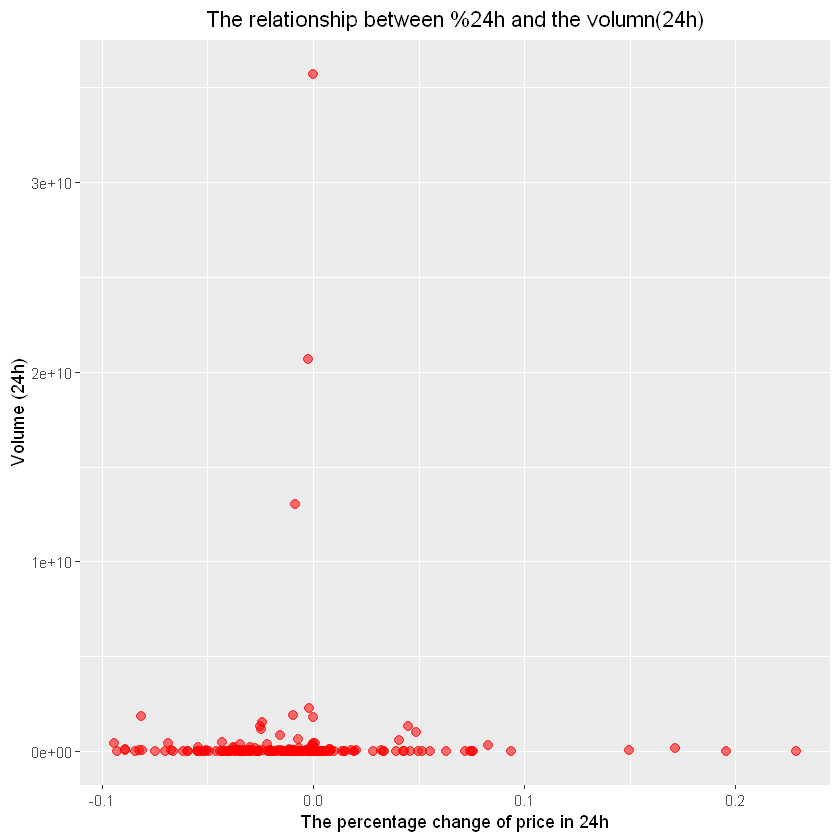

In [88]:
vol_change %>%
    ggplot(
    mapping=aes(x=Change_24h, y= Volumn_24h, alpha=1/200)) +
    geom_point(colour = "red", size = 2.5) + guides(alpha=FALSE) +
    xlab('The percentage change of price in 24h') + 
    ylab('Volume (24h)') + 
    ggtitle('The relationship between %24h and the volumn(24h)')+
    theme(plot.title = element_text(hjust=0.5))
    

In [91]:
#Conclusion: Cryptocurrencies investors' buy and sell strategies won't be affected by the 24hour price changes, although this market is running all the time. Also, we can 
#notice that there are three cryptocurrencies have higher transaction volume than others, and their prices have not changed much within the last 24 hours.

In [89]:
vol_24h_top3 <- vol_change %>%
    arrange(desc(Volumn_24h)) %>%
    head(3)

vol_24h_top3

,Name,Symbol,Volumn_24h,Price_USD,Change_24h,Change_7d
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Tether,USDT,35713268641,1.00,0.0001,-0.0006
2,Bitcoin,BTC,20692351668,11349.99,-0.0025,0.0700
3,Ethereum,ETH,13022103571,372.74,-0.0087,0.0688


In [92]:
#The highest transaction volume in 24h is Tether(USDT). USDT is a stable coin that mirrors the price of the US dollar. Thus, investors can buy this currency when 
#the market changes drastically to avoid risk. There is no doubt that the actual most popular cryptocurrency is Bitcoin, with around 20 billion transaction volume 
#within 24 hours. ETH is still a popular coin following Bitcoin. 